# CHAPTER 9
---
# Data Aggregation and Group Operations

In [1]:
from IPython.display import Image

import pandas as pd
import numpy as np

## GroupBy Mechanics <font color='green'>[Essential]</font>

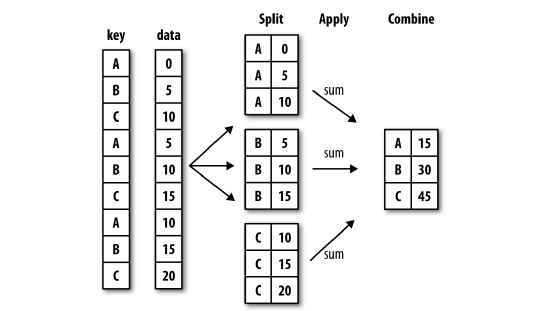

In [2]:
Image("groupby.png")

In [3]:
df = pd.DataFrame(
    {
        'key1' : ['a', 'a', 'b', 'b', 'a'],
        'key2' : ['one', 'two', 'one', 'two', 'one'],
        'data1' : np.random.randn(5),
        'data2' : np.random.randn(5)
    }
)

In [4]:
df

key1 key2     data1     data2
0    a  one  0.694327  1.068227
1    a  two -0.325977 -1.354718
2    b  one -0.482341  2.710892
3    b  two  0.311243 -0.658026
4    a  one -0.814903 -0.941416

In [5]:
grouped = df['data1'].groupby(df['key1'])

In [6]:
grouped # grouped est un GroupBy oject, il n'a encore rien calculé 

In [7]:
grouped.mean() # on agrège les groupes avec la fonction de réduction «mean»

key1
a   -0.148851
b   -0.085549
Name: data1, dtype: float64

In [8]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [9]:
means

key1  key2
a     one    -0.060288
      two    -0.325977
b     one    -0.482341
      two     0.311243
Name: data1, dtype: float64

In [10]:
# souvent, les clefs et les valeurs à réduire sont contenues dans le même DataFrame
# on peut alors utiliser une syntaxe plus concise
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.060288  0.063405
     two  -0.325977 -1.354718
b    one  -0.482341  2.710892
     two   0.311243 -0.658026

### Iterating Over Groups <font color='#D22328'>[Advanced]</font>

In [11]:
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(type(group))
    print(group)
    print('-----------------------------------------------')

('a', 'one')
<class 'pandas.core.frame.DataFrame'>
  key1 key2     data1     data2
0    a  one  0.694327  1.068227
4    a  one -0.814903 -0.941416
-----------------------------------------------
('a', 'two')
<class 'pandas.core.frame.DataFrame'>
  key1 key2     data1     data2
1    a  two -0.325977 -1.354718
-----------------------------------------------
('b', 'one')
<class 'pandas.core.frame.DataFrame'>
  key1 key2     data1     data2
2    b  one -0.482341  2.710892
-----------------------------------------------
('b', 'two')
<class 'pandas.core.frame.DataFrame'>
  key1 key2     data1     data2
3    b  two  0.311243 -0.658026
-----------------------------------------------


In [12]:
for name, group in df.groupby(['key1']):
    print(name)
    print(type(group))
    print(group)
    print('-----------------------------------------------')

a
<class 'pandas.core.frame.DataFrame'>
  key1 key2     data1     data2
0    a  one  0.694327  1.068227
1    a  two -0.325977 -1.354718
4    a  one -0.814903 -0.941416
-----------------------------------------------
b
<class 'pandas.core.frame.DataFrame'>
  key1 key2     data1     data2
2    b  one -0.482341  2.710892
3    b  two  0.311243 -0.658026
-----------------------------------------------


### Selecting a Column or Subset of Columns <font color='green'>[Essential]</font>

In [13]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.063405
     two  -1.354718
b    one   2.710892
     two  -0.658026

In [14]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one     0.063405
      two    -1.354718
b     one     2.710892
      two    -0.658026
Name: data2, dtype: float64

In [15]:
df

key1 key2     data1     data2
0    a  one  0.694327  1.068227
1    a  two -0.325977 -1.354718
2    b  one -0.482341  2.710892
3    b  two  0.311243 -0.658026
4    a  one -0.814903 -0.941416

### Grouping with Dicts and Series <font color='#D22328'>[Advanced]</font>

### Grouping with Functions <font color='#D22328'>[Advanced]</font>

 ### Grouping by Index Levels <font color='#D22328'>[Advanced]</font>

## Data Aggregation <font color='#D22328'>[Advanced]</font>

By aggregation, I am generally referring to any data transformation that produces scalar
values from arrays. In the examples above I have used several of them, such as mean,
count, min and sum. You may wonder what is going on when you invoke mean() on a
GroupBy object. Many common aggregations, such as those found in Table 9-1, have
optimized implementations that compute the statistics on the dataset in place. However,
you are not limited to only this set of methods.

In [16]:
grouped = df.groupby('key1')

In [17]:
# il existe de nombreuses fonctions d'agrégation optimisées pour les objets GroupBy
grouped['data1'].quantile(0.9)

key1
a    0.490266
b    0.231884
Name: data1, dtype: float64

In [18]:
# on peut définir nous même nos fonctions
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

data1     data2
key1                    
a     1.509229  2.422945
b     0.793584  3.368917

### Column-wise and Multiple Function Application <font color='#D22328'>[Advanced]</font>

In [19]:
grouped['data1'].agg(['mean', 'std'])

mean       std
key1                    
a    -0.148851  0.770048
b    -0.085549  0.561148

In [20]:
# on peut appliquer des fonctions différentes aux différentes colonnes 
# en utilisant des dictionnaires d'agrégation
grouped.agg({'data1': np.mean, 'data2': np.sum})

data1     data2
key1                    
a    -0.148851 -1.227908
b    -0.085549  2.052866

### Returning Aggregated Data in “unindexed” Form <font color='#D22328'>[Advanced]</font>

In [21]:
grouped = df.groupby('key1')
grouped.mean()

data1     data2
key1                    
a    -0.148851 -0.409303
b    -0.085549  1.026433

In [22]:
grouped = df.groupby('key1', as_index=False)
grouped.mean()

key1     data1     data2
0    a -0.148851 -0.409303
1    b -0.085549  1.026433

## Group-wise Operations and Transformations <font color='#D22328'>[Advanced]</font>

### Apply: General split-apply-combine <font color='#D22328'>[Advanced]</font>

In [23]:
df

key1 key2     data1     data2
0    a  one  0.694327  1.068227
1    a  two -0.325977 -1.354718
2    b  one -0.482341  2.710892
3    b  two  0.311243 -0.658026
4    a  one -0.814903 -0.941416

In [24]:
def top(df, n=5, column='data1'):
    return df.sort_values(by=column)[-n:]

In [25]:
df.groupby('key1').apply(top, n=2) # les arguments de apply sont passés à top

key1 key2     data1     data2
key1                                
a    1    a  two -0.325977 -1.354718
     0    a  one  0.694327  1.068227
b    2    b  one -0.482341  2.710892
     3    b  two  0.311243 -0.658026

In [26]:
df

key1 key2     data1     data2
0    a  one  0.694327  1.068227
1    a  two -0.325977 -1.354718
2    b  one -0.482341  2.710892
3    b  two  0.311243 -0.658026
4    a  one -0.814903 -0.941416